#Лабораторная работа 2

Панова Дарья ИУ10-36 Вариант 11

Цель работы

Изучить алгоритмы сортировки, реализовать алгоритмы сортировки, 
провести сравнение эффективности алгоритмов сортировки на разных типах данных.

Задачи работы


-Провести классификацию алгоритмов сортировки.

-Подготовить теоретическое описание алгоритмов сортировки согласно номеру индивидуального варианта.

-Подготовить блок-схему алгоритмов.

-Представить описание алгоритмов на псевдокоде.

-Описать достоинства и недостатки каждого алгоритма.

-Реализовать алгоритмы сортировки согласно номеру индивидуального варианта.

-Протестировать корректность реализации алгоритма

-Провести ручную трассировку алгоритма.

-Провести сравнение указанных алгоритмов сортировки массивов, содержащих n1, n2, n3 и n4 элементов.

-Каждую функцию сортировки вызывать трижды: для сортировки упорядоченного массива, массива, упорядоченного в обратном 
порядке и неупорядоченного массива. Сортируемая последовательность для всех методов должна быть одинаковой (сортировать копии одного массива).

-Проиллюстрировать эффективность алгоритмов сортировок по заданному критерию. Построить диаграммы указанных зависимостей.

Топологическая сортировка 

Топологическая сортировка для ориентированного ациклического графа (Directed Acyclic Graphs)-это линейное упорядочение 
вершин, для которого выполняется следующее условие — для каждого направленного ребра uv вершина u предшествует вершине v в
упорядочении.
 Алгоритм работает за время O(V + E), где V - количество узлов, а E - количество ребер.

Алгоритм поиска топологической сортировки.
Существует несколько алгоритмов для выполнения топологической сортировки, но наиболее распространенный - это алгоритм, основанный на поиске в глубину (DFS):

1. Инициализация:
  - Для каждой вершины графа устанавливается ее входная степень (количество входящих дуг).
  - Создается пустой список результат для хранения отсортированных вершин.
  - Создается пустой список очередь для хранения вершин без входящих дуг.
  
2. Поиск в глубину:
  - Для каждой вершины v без входящих дуг (входная степень = 0) вызывается рекурсивная функция dfs(v).
  - Функция dfs(v) делает следующее:
   - Помечает вершину v как посещенную.
   - Для каждой смежной вершины u вершины v:
     - Уменьшает входную степень вершины u на 1.
     - Если входная степень вершины u становится равной 0, добавляет u в очередь очередь.
   - После обработки всех смежных вершин добавляет v в список результат.
   
3. Обработка очереди:
  - Пока очередь не пуста, извлекайте вершину из начала очереди и добавляйте ее в список результат.

Топологическая сортировка в основном используется для составления графика работ из заданных зависимостей между ними. В компьютерных науках применяется для планирования команд, упорядочения ячеек для вычисления формулы при повторном вычислении значений формул в электронных таблицах, логического синтеза, определения порядка задач компиляции для выполнения в make-файлах, сериализации данных и разрешения символьных зависимостей в компоновщиках 

Псевдокод алгоритма топологической сортировки 

Блок-схема алгоритма топологической сортировки

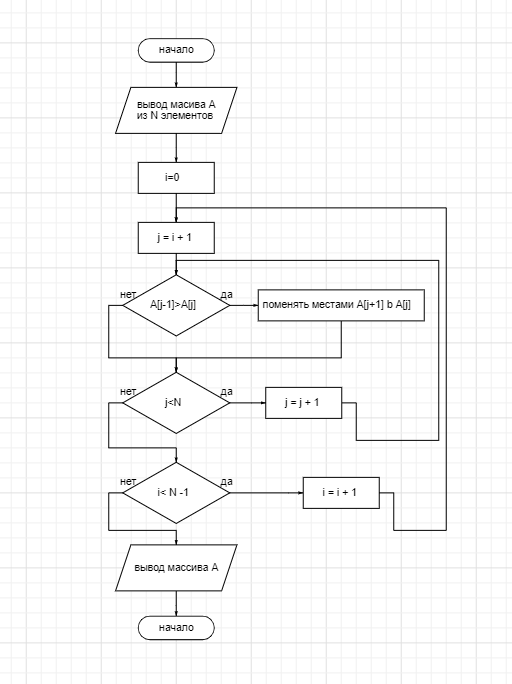

Реализация алгоритма топологической сортировки 

In [2]:
from collections import defaultdict

def topologicalsort(graph):
    in_degree = defaultdict(int) # словарь хранит степени входящих ребер 
    for node in graph: #перебор всех узлов 
        for neighbor in graph[node]:# перебор всех смежных узлов текущего узла 
            in_degree[neighbor] += 1
            
    queue = [node for node in graph if in_degree[node] == 0] #узлы, у которых нет входящих ребер
    result = [] # список в который добавляютяся узлы в топологическом порядке

    while queue:            #
        node = queue.pop(0)
        result.append(node)
      
        for neighbor in graph[node]:
            in_degree[neighbor] -= 1
            if in_degree[neighbor] == 0:
                queue.append(neighbor)
    
    if len(result) != len(graph):  #проверяет все ли  узлы добавлены в список 
            return None 

    return result
    
graph = {
 '1': ['2', '3'],
 '2': ['4'],
 '3': ['5'],
 '4': ['5'],
 '5': [],
}

sorted_graph = topologicalsort(graph)
print(sorted_graph)


['1', '2', '3', '4', '5']


Плавная сортировка (Smoothsort)

Это алгоритм сортировки, который основан на идее бинарных куч и стремится к более эффективному использованию памяти и процессорного времени по сравнению с традиционными алгоритмами, такими как сортировка пузырьком или сортировка вставками.
* Время: O(n log n)
* Память: O(n)

Основные принципы:

1.Разделение на кучи: Вначале входной массив разбивается на бинарные кучи (каждая куча имеет корень, а остальные элементы расположены в левом и правом поддеревьях).

2.Рекурсивная сортировка куч: Каждая куча сортируется рекурсивно с помощью алгоритма Smoothsort. Сортировка одной кучи происходит путем сравнения корневого элемента с его потомками и перемещения меньшего элемента вверх по дереву. Этот процесс повторяется рекурсивно для поддеревьев.

3.Объединение куч: После того, как все кучи отсортированы, они объединяются в единый отсортированный массив.

4.Оптимизация: Алгоритм Smoothsort стремится к минимизации ненужных операций обмена, эффективно используя пространство памяти и минимизируя количество сравнений и перемещений элементов.

Псевдокод алгоритма плавной сортировки

Описание:

1. Инициализация:
   - Создается массив `S`, который будет использоваться для отслеживания связей между элементами.
   - Массив `S` инициализируется нулями, кроме `S[1]`, который устанавливается в `n` (размер массива `A`).
2. Основной цикл:
   - Цикл повторяется до тех пор, пока `i` больше 0.
   - Внутри цикла:
      - Вычисляются индексы `p` и `q` (изначально `p` равно `i`).
      - `q` - индекс, связанный с `p` в массиве `S`.
      - Если `q` больше 1 и `A[p]` больше `A[q]`, элементы переставляются, и массив `S` обновляется.
      - Если `q` равно 1, то `i` устанавливается в 0, что завершает цикл.
      - В противном случае, `i` устанавливается в `p - 1` (переход к предыдущему элементу).
3. Возврат:
   - После завершения цикла массив `A` будет отсортирован.

Блок-схема алгоритма плавной сортировки 

<img src="plav.png">


 Реализация алгоритма плавной сортировки (Smoothsort)

In [2]:
def smoothsort(arr):
    def sift_down(start, end): # просеивание вниз 
        root = start # начальная позиция элемента
        while True:
            left = 2 * root + 1   
            right = left + 1   # расчитывает индексы левого и правого потомков 
            swap = root

            if left <= end and arr[swap] < arr[left]:
                swap = left
            if right <= end and arr[swap] < arr[right]:
                swap = right
            if swap == root:
                return
            arr[root], arr[swap] = arr[swap], arr[root]
            root = swap

    def build_heap():  # строит кучу из массива `arr`
        for start in range((len(arr) - 2) // 2, -1, -1):  # проходит по массиву с конца, используя индексы род.элементов 
            sift_down(start, len(arr) - 1)
            #устанавливает элементы на правильные места в куче 

    def smooth_sort_util(): 
        build_heap()
        end = len(arr) - 1 #последний элемент кучи 
        while end > 0:
            arr[0], arr[end] = arr[end], arr[0]# меняет местами корень кучи (макс.эл.)с последним эл. кучи
            end -= 1
            sift_down(0, end) # 
    smooth_sort_util()


if __name__ == "__main__":
    data = [5, 3, 8, 4, 2,4,5,6,7,4,5,78,]
    smoothsort(data)
    print(data)
    

[2, 3, 4, 4, 4, 5, 5, 5, 6, 7, 8, 78]


Графики 

Построение графиков для наглядной оценки эффективности алгоритмов на разных входных данных.

In [4]:
import functools
import timeit
import typing
import random
import matplotlib.pyplot as plt

# %load -y -n -s get_usage_time usage_time.py
# обёртка функции для подсчёта времени
def get_usage_time(
    *, number: int = 1, setup: str = 'pass', ndigits: int = 3
) -> typing.Callable:

    def decorator(func: typing.Callable) -> typing.Callable:
        @functools.wraps(func)
        def wrapper(*args, **kwargs) -> float:
            usage_time = timeit.timeit(
                lambda: func(*args, **kwargs),
                setup=setup,
                number=number,
            )
            return round(usage_time / number, ndigits)

        return wrapper

    return decorator


Плавная сортировка 

[1000, 5000, 10000, 100000]


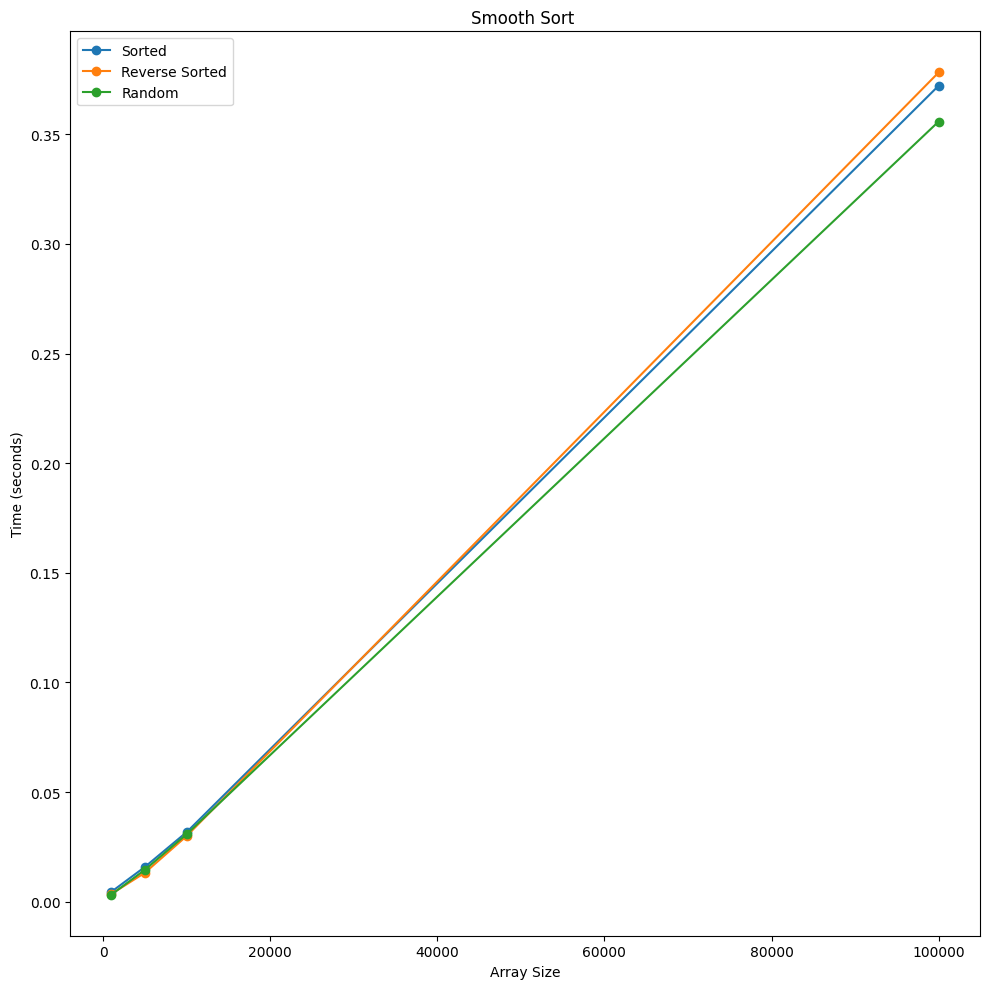

In [5]:
sizes = [1000, 5000, 10000, 100000]
results = {
    'Smooth Sort': {'Sorted': [], 'Reverse Sorted': [], 'Random': []}
}

def create_results(name, function, arrays):
    global results
    for key, arr in arrays.items():
        func = get_usage_time(number = 10,ndigits=7)(function)
        results[name][key].append(func(arr))

for n in sizes:
    arrays = {
        'Sorted': list(range(n)), 
        'Reverse Sorted': list(range(n, 0, -1)), 
        'Random': random.sample(range(n), n)
    }

    create_results('Smooth Sort', smoothsort, arrays)

def plot_results(results):
    fig, ax = plt.subplots(figsize=(10, 10)) # Изменяем на (1, 1)
    print(sizes)

    ax.plot(sizes, results['Smooth Sort']['Sorted'], label='Sorted', marker='o')
    ax.plot(sizes, results['Smooth Sort']['Reverse Sorted'], label='Reverse Sorted', marker='o')
    ax.plot(sizes, results['Smooth Sort']['Random'], label='Random', marker='o')
    ax.set_title('Smooth Sort ')
    ax.set_xlabel('Array Size')
    ax.set_ylabel('Time (seconds)')
    ax.legend()

    plt.tight_layout()
    plt.show()

plot_results(results)

Топологическая сортировка 

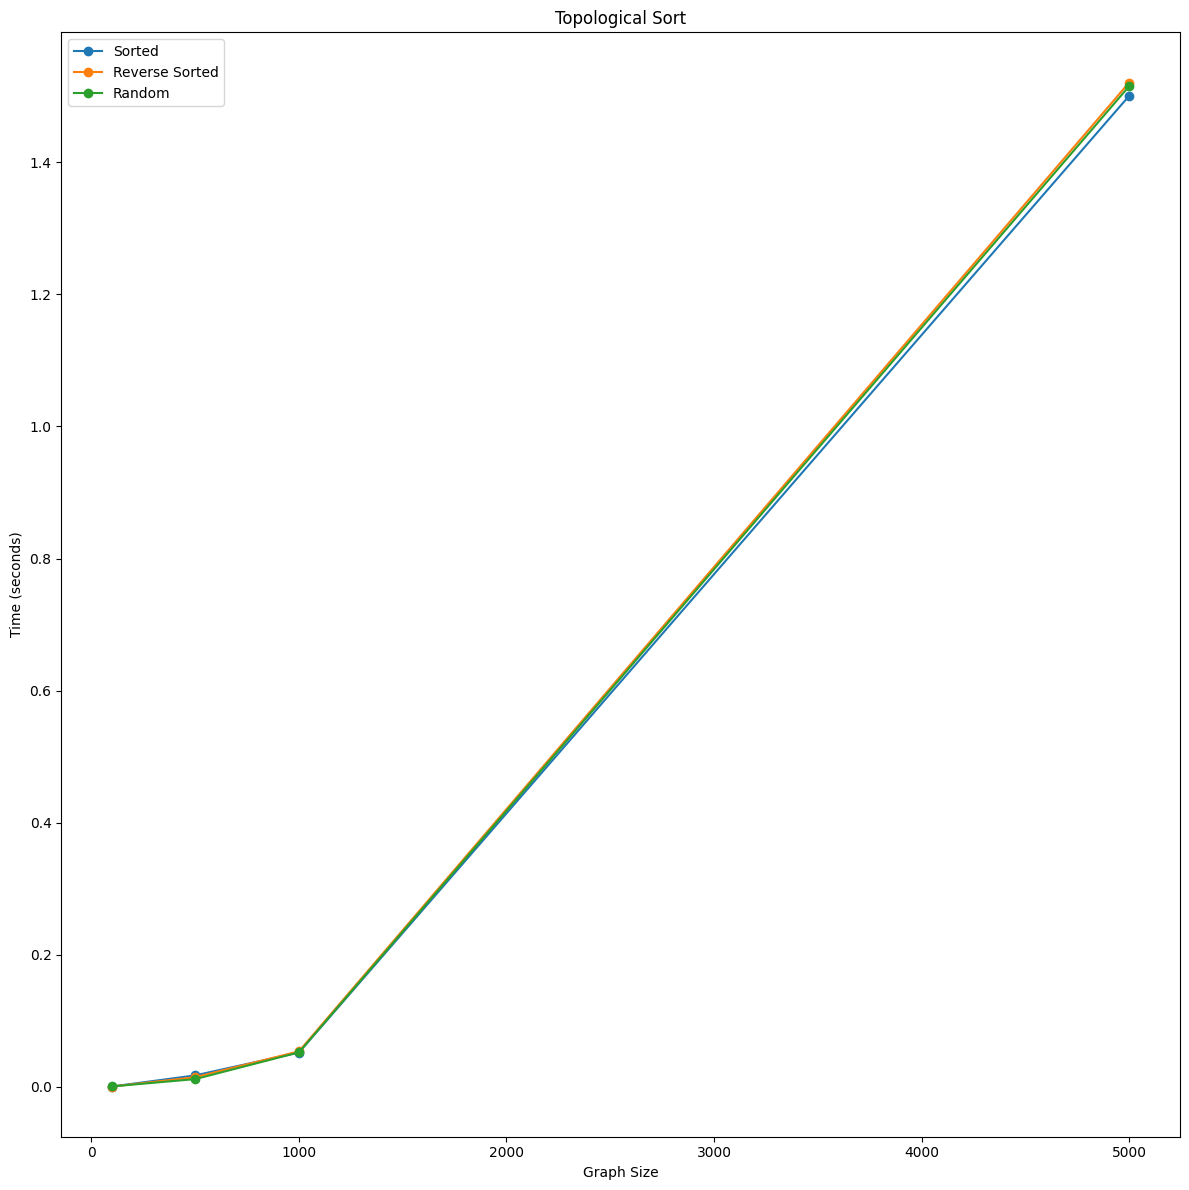

In [7]:
import random
def create_dag(n):
    graph = {i: [] for i in range(n)}
    for i in range(n):
        for j in range(i + 1, n):  # Добавляем рёбра только от меньших к большим
            if random.random() > 0.5:  
                graph[i].append(j)
    return graph


sizes = [100, 500, 1000, 5000]
results = {
    'Topological Sort': {'Sorted': [], 'Reverse Sorted': [], 'Random': []}
}

def create_results(name, function, arrays):
    global results
    for key, arr in arrays.items():
        func = get_usage_time(number=10, ndigits=7)(function)
        results[name][key].append(func(arr))

for n in sizes:
    graph = create_dag(n)  # Генерируем DAG
    arrays = {
        'Sorted': graph,  # Используем уже созданный граф как "Sorted"
        'Reverse Sorted': graph,  # Можно заменить на другой граф, если нужно
        'Random': graph  # Можно заменить на другой граф, если нужно
    }
    create_results('Topological Sort', topologicalsort, arrays)

def plot_results(results):
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.plot(sizes, results['Topological Sort']['Sorted'], label='Sorted', marker='o')
    ax.plot(sizes, results['Topological Sort']['Reverse Sorted'], label='Reverse Sorted', marker='o')
    ax.plot(sizes, results['Topological Sort']['Random'], label='Random', marker='o')
    ax.set_title('Topological Sort')
    ax.set_xlabel('Graph Size')
    ax.set_ylabel('Time (seconds)')
    ax.legend()
    plt.tight_layout()
    plt.show()

plot_results(results)


трассировка сортировок 

In [ ]:
Топологическая сортировка 

Добавим промежуточные выводы в алгоритмах, для просмотра промежуточных результатов.

In [4]:
from collections import defaultdict
def topologicalsort(graph):
    in_degree = defaultdict(int)

    # Заполнение in_degree
    for node in graph:
        for neighbor in graph[node]:
            in_degree[neighbor] += 1

    # Инициализация очереди
    queue = [node for node in graph if in_degree[node] == 0]
    result = []

    print("Initial in-degree:", dict(in_degree))
    print("Initial queue:", queue)

    # Основной цикл
    while queue:
        node = queue.pop(0)
        result.append(node)
        print(f"\nNode: {node}")
        print("Current result:", result)

        for neighbor in graph[node]:
            in_degree[neighbor] -= 1

            if in_degree[neighbor] == 0:
                queue.append(neighbor)

        
        print("Current in-degree:", dict(in_degree))

    # Проверка на наличие цикла
    if len(result) != len(graph):
        return None

    return result


# Пример графа
graph = {
    '1': ['2', '3'],
    '2': ['4'],
    '3': ['5'],
    '4': ['5'],
    '5': [],
}

sorted_graph = topologicalsort(graph)
print("\nFinal sorted order:", sorted_graph)

Initial in-degree: {'2': 1, '3': 1, '4': 1, '5': 2, '1': 0}
Initial queue: ['1']

Node: 1
Current result: ['1']
Current in-degree: {'2': 0, '3': 0, '4': 1, '5': 2, '1': 0}

Node: 2
Current result: ['1', '2']
Current in-degree: {'2': 0, '3': 0, '4': 0, '5': 2, '1': 0}

Node: 3
Current result: ['1', '2', '3']
Current in-degree: {'2': 0, '3': 0, '4': 0, '5': 1, '1': 0}

Node: 4
Current result: ['1', '2', '3', '4']
Current in-degree: {'2': 0, '3': 0, '4': 0, '5': 0, '1': 0}

Node: 5
Current result: ['1', '2', '3', '4', '5']
Current in-degree: {'2': 0, '3': 0, '4': 0, '5': 0, '1': 0}

Final sorted order: ['1', '2', '3', '4', '5']


Плавная сортировка 

Добавим промежуточные выводы в алгоритмах, для просмотра промежуточных результатов.

Каждое просеивание меняет местами узлы, если текущий узел меньше своих дочерних.Сортировка продолжается, пока 
массив не будет полностью отсортирован. В конце выводится отсортированный массив.

In [21]:
def smoothsort(arr):
    def sift_down(start, end):
        root = start
        while True:
            left = 2 * root + 1
            right = left + 1
            swap = root

            if left <= end and arr[swap] < arr[left]:
                swap = left
            if right <= end and arr[swap] < arr[right]:
                swap = right
            if swap == root:
                return
            arr[root], arr[swap] = arr[swap], arr[root]
            root = swap

    def build_heap():
        for start in range((len(arr) - 2) // 2, -1, -1):
            sift_down(start, len(arr) - 1)

    def smooth_sort_util():
        build_heap()
        end = len(arr) - 1
        print(arr)
        while end > 0:
            arr[0], arr[end] = arr[end], arr[0]
            end -= 1
            sift_down(0, end)
            print(arr)

    smooth_sort_util()

if __name__ == "__main__":
    data = [5, 3, 8, 4, 2, 4, 5, 6, 7, 4, 5, 78]
    print(data)
    smoothsort(data)
    print(data)


[5, 3, 8, 4, 2, 4, 5, 6, 7, 4, 5, 78]
[78, 7, 8, 6, 5, 5, 5, 3, 4, 4, 2, 4]
[8, 7, 5, 6, 5, 4, 5, 3, 4, 4, 2, 78]
[7, 6, 5, 4, 5, 4, 5, 3, 2, 4, 8, 78]
[6, 5, 5, 4, 4, 4, 5, 3, 2, 7, 8, 78]
[5, 4, 5, 3, 4, 4, 5, 2, 6, 7, 8, 78]
[5, 4, 5, 3, 4, 4, 2, 5, 6, 7, 8, 78]
[5, 4, 4, 3, 4, 2, 5, 5, 6, 7, 8, 78]
[4, 4, 4, 3, 2, 5, 5, 5, 6, 7, 8, 78]
[4, 3, 4, 2, 4, 5, 5, 5, 6, 7, 8, 78]
[4, 3, 2, 4, 4, 5, 5, 5, 6, 7, 8, 78]
[3, 2, 4, 4, 4, 5, 5, 5, 6, 7, 8, 78]
[2, 3, 4, 4, 4, 5, 5, 5, 6, 7, 8, 78]
[2, 3, 4, 4, 4, 5, 5, 5, 6, 7, 8, 78]


Вывод

В общем, выбор подходящего алгоритма сортировки зависит от характеристик конкретной задачи и данных:

* Топологическая сортировка применяется для упорядочивания узлов в направленном ациклическом графе (DAG) таким образом, чтобы каждый узел предшествовал своим потомкам. Она используется в задачах, связанных с зависимостями, например, при планировании задач, компиляции программ или анализе зависимостей в сетевых потоках данных.
* Плавная сортировка - это алгоритм сортировки, который упорядочивает элементы в массиве по возрастанию. Она используется для классических задач сортировки данных, например, для упорядочивания списка имен, чисел или дат.

В результате, выбор алгоритма должен основываться на критериях производительности, устойчивости и сложности реализации в зависимости от контекста применения.

1. В чем состоит суть метода сортировки вставками?
Суть метода сортировки вставками заключается в том, что массив разбивается на отсортированную и неотсортированную части. В процессе сортировки элементы из неотсортированной части последовательно вставляются в правильное место в отсортированной части.

2. Какие шаги выполняет алгоритм сортировки вставками?

Начинаем с первого элемента (он уже отсортирован).
Берем следующий элемент и сравниваем его с элементами отсортированной части.
Вставляем его в подходящую позицию, сдвигая необходимые элементы.
3. Как программно реализуется сортировка вставками?
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
        
4. В чем достоинства и недостатки метода сортировки вставками?
Достоинства:
Простота реализации.
Хорошо работает на небольших и почти отсортированных массивах.
Недостатки:

5. Низкая эффективность на больших массивах (O(n^2)).
Сравнения и сдвиги могут быть затратными.
Приведите практический пример сортировки массива методом вставок.
Пример: сортируем массив 5, 2, 9, 1, 5, 6.
Результат: 1, 2, 5, 5, 6, 9.

6. В чем состоит суть сортировки методом Шелла?
Сортировка Шелла является обобщенной сортировкой вставками, которая сначала сортирует элементы, находящиеся на определенном расстоянии друг от друга, затем уменьшает это расстояние и повторяет процесс.

7. За счет чего метод Шелла дает лучшие показатели по сравнению с простейшими методами?
Сортировка Шелла уменьшает количество перемещений и сравнений, так как она позволяет поочередно упорядочивать более близко расположенные элементы, что делает массив более упорядоченным к моменту, когда применяется стандартная сортировка вставками.

8. Приведите практический пример сортировки массива методом Шелла.
Пример: сортируем массив 5, 2, 9, 1, 5, 6 с шагом 3.
По мере уменьшения шага массив превратится в: 1, 2, 5, 5, 6, 9.

9. Какой фактор оказывает наибольшее влияние на эффективность сортировки методом Шелла?
Выбор последовательности шагов (интервалы) имеет наибольшее влияние на эффективность.

10. Какие последовательности шагов группировки рекомендуются для практического использования в методе Шелла?
Часто используются последовательности Хиббарда или Седжвика, которые обеспечивают хорошие результаты на практике.

11. Как программно реализуется сортировка методом Шелла?

def shell_sort(arr):
    n = len(arr)
    gap = n // 2
    while gap > 0:
        for i in range(gap, n):
            temp = arr[i]
            j = i
            while j >= gap and arr[j - gap] > temp:
                arr[j] = arr[j - gap]
                j -= gap
            arr[j] = temp
        gap //= 2
        
12. В чем состоит суть метода сортировки выбором?
Суть сортировки выбором заключается в том, чтобы последовательно находить минимальный элемент из неотсортированной части массива и перемещать его в конец отсортированной части.

13. Какие шаги выполняет алгоритм сортировки выбором?

*Инициализируем индекс для отсортированной части.
*Находим минимальный элемент в неотсортированной части.
*Меняем его местами с первым элементом неотсортированной части.
14. Как программно реализуется сортировка выбором?
def selection_sort(arr):
    for i in range(len(arr)):
        min_index = i
        for j in range(i + 1, len(arr)):
            if arr[j] < arr[min_index]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]
        
15. В чем достоинства и недостатки метода сортировки выбором?
Достоинства:

Простота реализации.
Не требует дополнительной памяти.
Недостатки:

Низкая эффективность на больших массивах (O(n^2)).
Неустойчивая сортировка.

16. Приведите практический пример сортировки массива методом выбора.
Пример: сортируем массив 5, 2, 9, 1, 5, 6.
Результат: 1, 2, 5, 5, 6, 9.

17. В чем состоит суть метода сортировки обменом?
Суть метода сортировки обменом заключается в повторном прохождении по массиву и обмене соседних элементов, если они находятся в неправильном порядке, до тех пор, пока массив не станет отсортированным.

18. Какие шаги выполняет алгоритм сортировки обменом?

* Проходим по массиву, сравнивая пары соседних элементов.
* Если элементы стоят не в правильном порядке, меняем их местами.
* Повторяем процесс до тех пор, пока массив не отсортирован.
19.Как программно реализуется сортировка обменом?
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
  
20. В чем достоинства и недостатки метода сортировки обменом?
Достоинства:

Простота реализации.
Легко понимать.
Недостатки:

Низкая эффективность на больших массивах (O(n^2)).
Неэффективно для почти отсортированных данных.

21. Приведите практический пример сортировки массива методом обмена.
Пример: сортируем массив 5, 2, 9, 1, 5, 6.
Результат: 1, 2, 5, 5, 6, 9.

22. В чем состоит суть метода быстрой сортировки?
Суть быстрой сортировки заключается в выборе опорного элемента и разделении массива на две части: элементы меньше опорного и элементы больше его. Затем рекурсивно применяется быстрая сортировка к обеим частям.

23. За счет чего метод быстрой сортировки дает лучшие показатели по сравнению с простейшими методами?
Он использует принцип "разделяй и властвуй", что значительно сокращает количество операций за счет упорядочивания частей массива.

24. Что такое опорный элемент в методе быстрой сортировки и как он используется?
Опорный элемент — это элемент массива, относительно которого происходит разделение на меньшие и большие элементы. Это помогает организовать процесс сортировки.

25. Приведите практический пример быстрой сортировки массива.
Пример: сортируем массив 5, 3, 8, 4, 2.
Результат: 2, 3, 4, 5, 8.

26. Что можно сказать о применимости метода быстрой сортировки с точки зрения его эффективности?
Этот метод эффективен в среднем случае и широко используется на практике, так как имеет среднюю временную сложность O(n log n).

27. Какой фактор оказывает решающее влияние на эффективность метода быстрой сортировки?
Выбор опорного элемента. Неправильный выбор может снизить эффективность до O(n²).

28. Почему выбор серединного элемента в качестве опорного в методе быстрой сортировки может резко ухудшать эффективность метода?
Если массив отсортирован или почти отсортирован, использование серединного элемента может привести к несбалансированным разделениям.

29. Какое правило выбора опорного элемента в методе быстрой сортировки является наилучшим и почему его сложно использовать?
Правило "медиана трёх" (первый, средний и последний элементы) является хорошим, но его сложно реализовать в непрерывных потоках данных.

30. Какое простое правило выбора опорного элемента в методе быстрой сортировки рекомендуется использовать на практике?
Рекомендуется использовать первый, последний или случайный элемент массива в качестве опорного элемента.

31. Какие усовершенствования имеет базовый алгоритм метода быстрой сортировки?
Использование сортировки вставками на маленьких подмассивах, оптимизация выбора опорного элемента, уменьшение числа рекурсивных вызовов.

32. Быстрая сортировка проще всего программно реализуется с помощью рекурсии, потому что рекурсивный подход естественно соответствует разбиению массива на подмассивы. Каждый рекурсивный вызов обрабатывает меньшую часть данных, что делает реализацию интуитивной и простой.

33. Рекурсивный вариант метода быстрой сортировки реализуется следующим образом:

* Выбирается опорный элемент (pivot).
* Элементы массива делятся на два подмассива: элементы меньше опорного и элементы больше опорного.
* Рекурсивно вызывается быстрая сортировка для обоих подмассивов.
* На выходе получаются отсортированные подмассивы, которые объединяются с опорным элементом.
  
34. Не рекурсивная реализация метода быстрой сортировки использует стек для хранения данных о текущем состоянии обработки подмассивов. Это позволяет избежать проблем с переполнением стека, связанных с глубокой рекурсией, и реализация становится более сложной из-за необходимости управлять состоянием стека.

35. Суть метода пирамидальной сортировки заключается в использовании структуры данных — пирамидального дерева (кучи), чтобы последовательно извлекать максимальные (или минимальные) элементы и помещать их в отсортированный массив.

36. Набор данных, имеющий пирамидальную организацию, представляет собой массив, представляющий собой бинарное дерево, которое соответствует свойствам кучи. В бинарной куче каждый родительский элемент больше (или меньше) своих дочерних элементов.

37. Дерево поиска и пирамидальное дерево отличаются по структуре и характеру хранения данных. В дереве поиска для любого узла все ключи в левом поддереве меньше, чем ключ узла, а все ключи в правом поддереве больше. В пирамидальном дереве такая зависимость существует лишь для родительских и дочерних узлов, где родитель всегда больше (или меньше) своих детей.

38. Пример пирамидального дерева с целочисленными ключами:

        10
       /  \
      9    8
     / \  / \
    7  6 5   4
В этом примере корень (10) больше своих дочерних элементов (9 и 8), что соответствует свойствам максимальной кучи.

39. Полезные свойства пирамидального дерева включают: эффективное добавление и удаление элементов (O(log n)), возможность быстрого нахождения максимального (или минимального) элемента, и упорядоченность, что позволяет использовать его в сортировочных алгоритмах, таких как пирамидальная сортировка.

40. Шаги при построении пирамидального дерева:

* Начать с последнего узла, у которого есть дочерние элементы (это будет последний родитель зубца).
* Вызвать процедуру просеивания для каждого родителя до корня.
* Применить процедуру «просеивания» для каждого родителя, чтобы преобразовать массив в кучу.
  
41. Просеивание элемента через пирамиду — это процесс, при котором элемент перемещается вниз по пирамиде (куче), заменяя своих детей, чтобы восстановить структуру кучи, если она была нарушена (например, при удалении корневого элемента).

42. Пример построения пирамидального дерева:

* Дается массив: 3, 1, 6, 5, 2, 4.
* Сначала строим кучу из этого массива, начиная с последнего родителя.
* После просеивания получаем 6, 5, 4, 1, 2, 3 (максимальная куча).

43. На втором этапе пирамидальной сортировки выполняются следующие шаги:

* Удаляется корневой элемент (максимум) и помещается в конец массива.
* Уменьшается размер кучи.
* Выполняется просеивание корневого элемента для восстановления свойств кучи.

44. Пример реализации второго этапа пирамидальной сортировки:

* Исходный массив после постройки кучи: 6, 5, 4, 1, 2, 3.
* Корень (6) удаляется и помещается в конец.
* Новый корень меняется с последним элементом (3), массив выглядит как 3, 5, 4, 1, 2.
* Процедура просеивания восстанавливает кучу: 5, 3, 4, 1, 2.

45. Трудоемкость метода пирамидальной сортировки составляет O(n log n) в худшем, среднем и лучшем случае. Это делает его более предсказуемым по сравнению с другими сортировками (например, быстрая сортировка может иметь O(n^2) в худшем случае).
